In [274]:
import random
import matplotlib.pyplot as plt
import numpy as np


# Set up parameters
size = 100  # size of the grid
num_iterations = 3  # number of iterations
cell_locations = [(size//2, size//2)]  # start with one cell at the center
cell_colors = [1] # initial color of the cell



In [108]:
#check neighbors
def check_neighbors(cell_locations, cell_colors):
    new_colors = []
    colors_array = np.zeros((size, size))
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        colors_array[x, y] = cell_colors[number]
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        red=np.sum(colors_array[x-1:x+2, y-1:y+2] == 1)
        blue=np.sum(colors_array[x-1:x+2, y-1:y+2] == -1)
        if red > blue:
            new_colors.append(-1)
        else:
            new_colors.append(1)
    return new_colors

In [206]:
#check neighbors (new)
def check_neighbors(cell_locations, cell_colors):
    new_colors = []
    colors_array = np.zeros((size, size))
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        colors_array[x, y] = cell_colors[number]
    for number in range(len(cell_locations)):
        x,y=cell_locations[number]
        total_color=0
        for color in colors_array[x-1:x+2, y-1:y+2]:
            for x in color:
                total_color=total_color+x
        new_color=cell_colors[number]-0.2*total_color+1
        if new_color < 0.1:
            new_color = 0.1
        new_colors.append(new_color)
    return new_colors

In [204]:
# Update cell locations
def cell_growth(cell_colors, cell_locations):
    new_locations = []
    new_colors=[]
    for number in range(0,len(cell_locations)):
        x,y = cell_locations[number]
        if random.random() < 0.5:
            new_locations.append((x, y))
            new_colors.append(cell_colors[number])
        else:
            if random.random() < 0.5:
                if (x+1, y) not in cell_locations:
                    new_locations.append((x+1, y))
                    new_colors.append(cell_colors[number])
                if (x-1, y) not in cell_locations:
                    new_locations.append((x-1, y))
                    new_colors.append(cell_colors[number])
            else: 
                if (x, y+1) not in cell_locations:
                    new_locations.append((x, y+1))
                    new_colors.append(cell_colors[number])
                if (x, y-1) not in cell_locations:
                    new_locations.append((x, y-1))
                    new_colors.append(cell_colors[number])
    return new_colors, new_locations

In [283]:
for j in range(30):
    cell_colors,cell_locations=cell_growth(cell_colors, cell_locations)
    for i in range(10):
        cell_colors=check_neighbors(cell_locations, cell_colors)

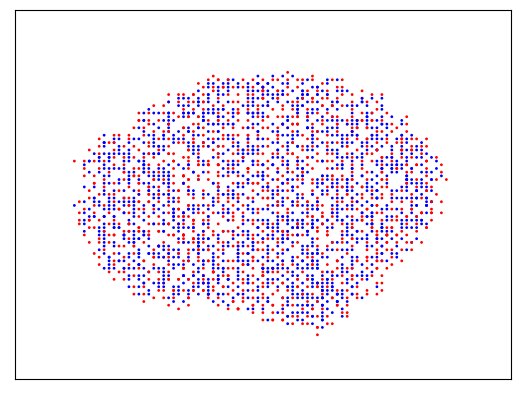

In [284]:
# Set up figure
fig, ax = plt.subplots()
ax.set_xlim([0, size])
ax.set_ylim([0, size])
ax.set_xticks([])
ax.set_yticks([])

ccolor=['red' if x>1 else 'blue' for x in cell_colors]
ax.scatter([x for x,y in cell_locations], [y for x,y in cell_locations], color=ccolor, s=1)

# Pause and show plot
plt.draw()
plt.pause(0.01)
ax.clear()

plt.show()

yes
